<a href="https://www.kaggle.com/code/anderaraujo/churn-analysis-dataviz-ml-various-models?scriptVersionId=136699807" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **CUSTOMER CHURN | DATAVIZ + ML | VARIOUS MODELS**

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## READING DATA

In [2]:
df = pd.read_csv("/kaggle/input/customer-churn-data/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EXPLORATORE DATA ANALYSIS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df = df.drop("customer_id",axis = 1)
df.head(3)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
df['gender'] = df['gender']\
.str.replace('Female','0')\
.str.replace('Male','1')\
.astype('int64')

In [6]:
numerical_vars = df.select_dtypes(exclude = 'object')
categorical_vars = df.select_dtypes(exclude = ['int64','float64'])

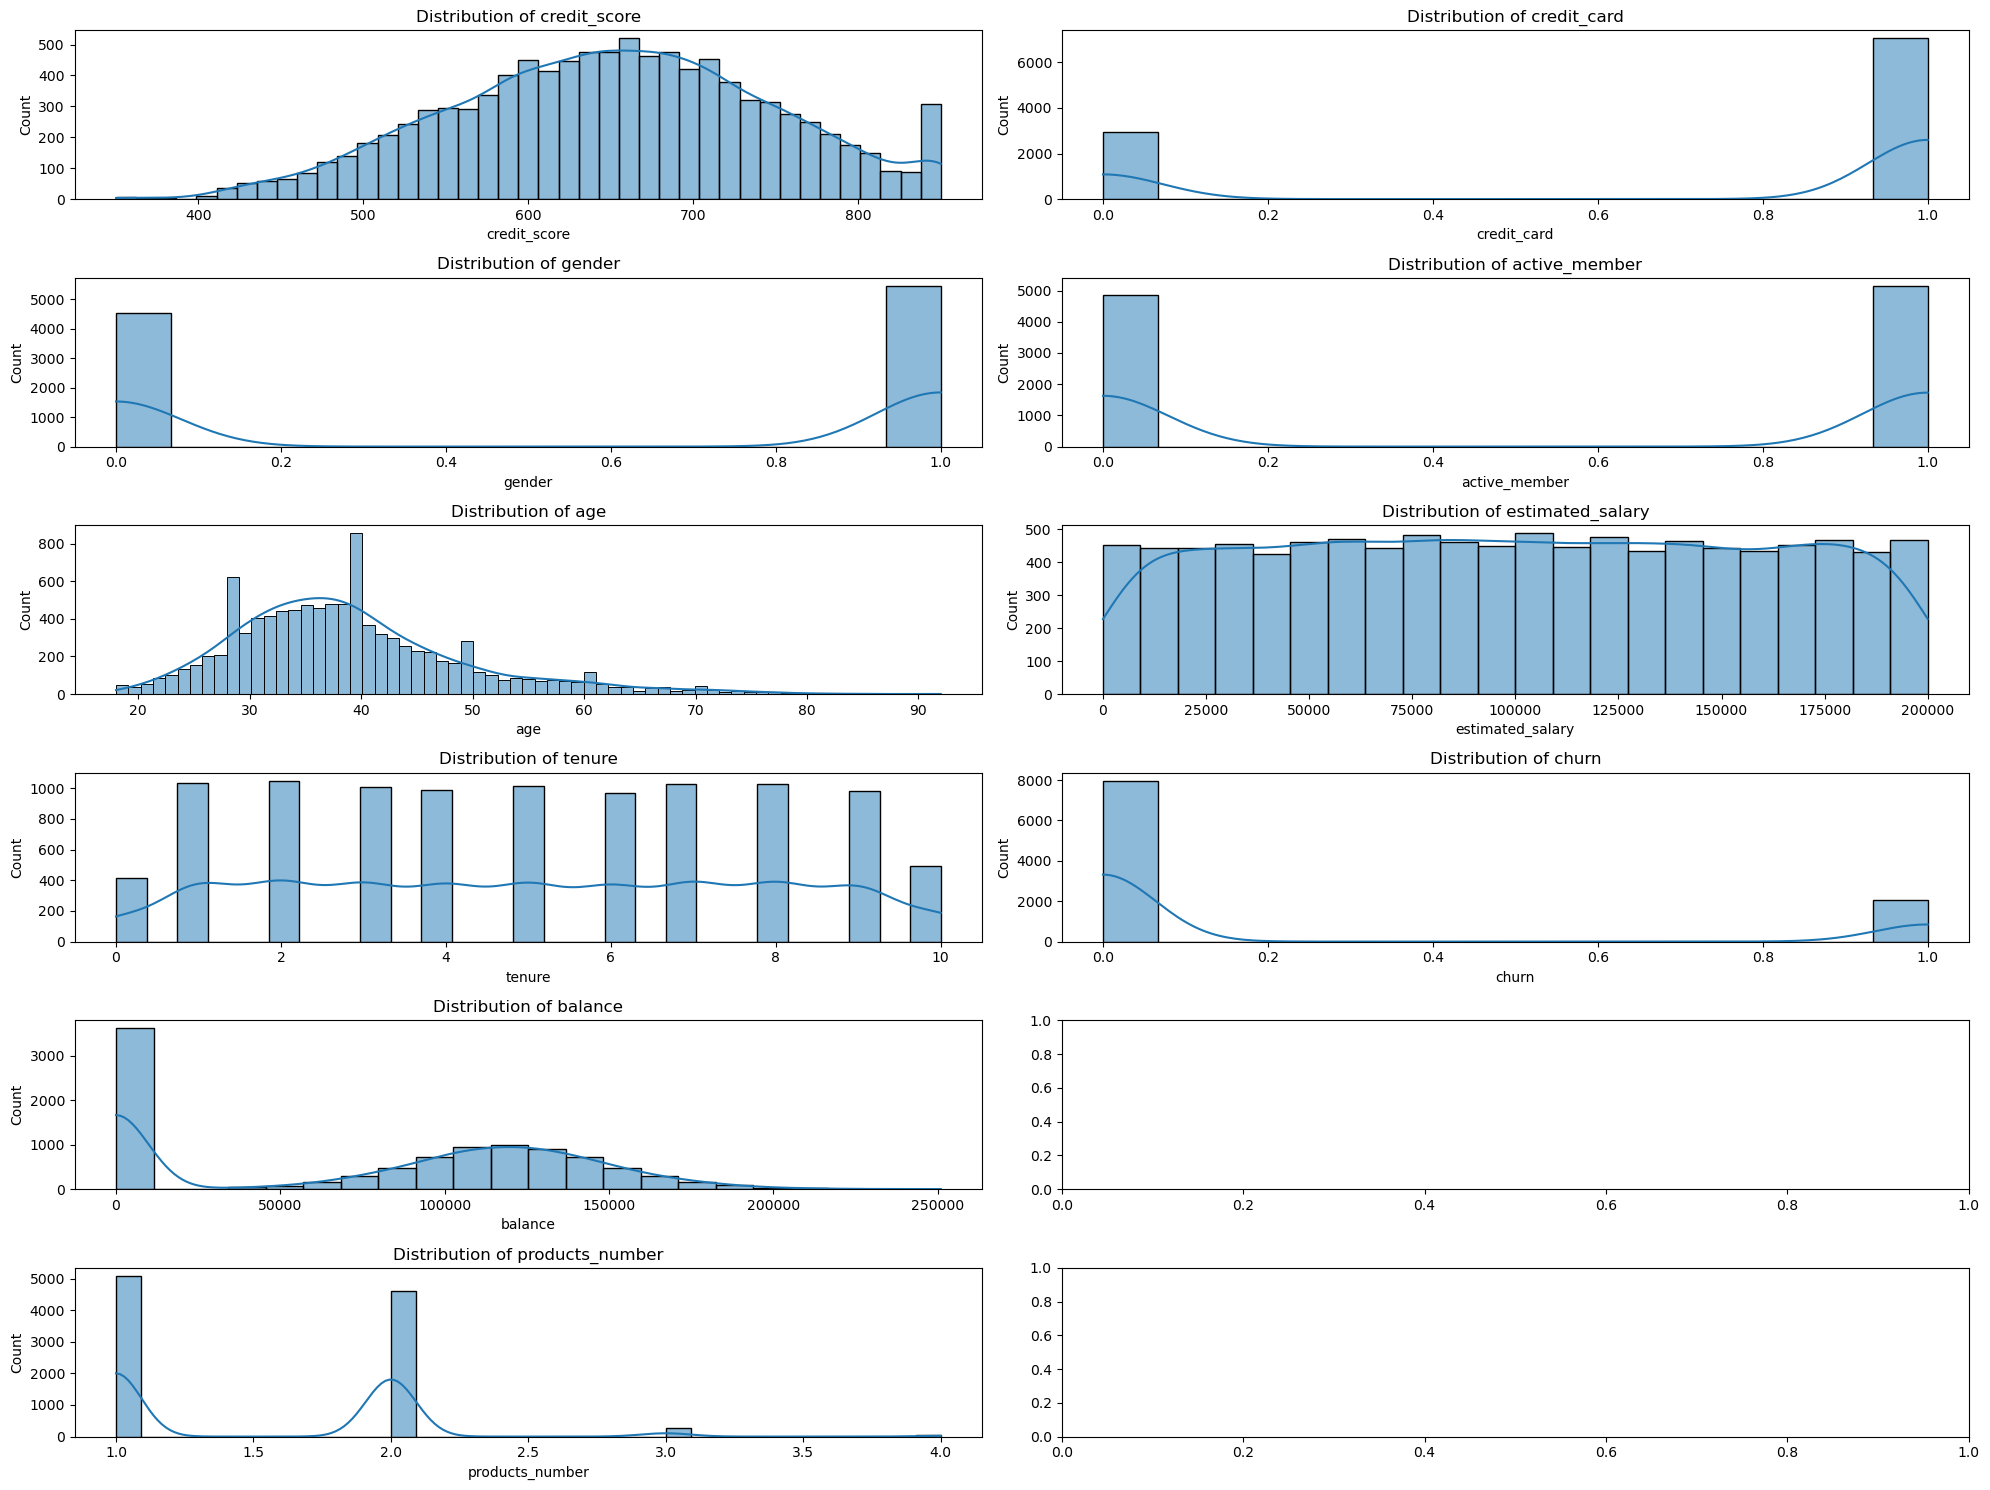

In [7]:
fig, axis = plt.subplots(6,2,figsize = (20,15))
for i, col in enumerate(numerical_vars.columns):
    if i < 6:
        j = 0    
        sns.histplot(x = df[col], kde = True, ax = axis[i,j])
        axis[i,j].set_title("Distribution of " + col)
    else:
        i = i - 6
        j = 1
        sns.histplot(x = df[col],kde = True, ax = axis[i,j])
        axis[i,j].set_title("Distribution of " + col)
plt.tight_layout()

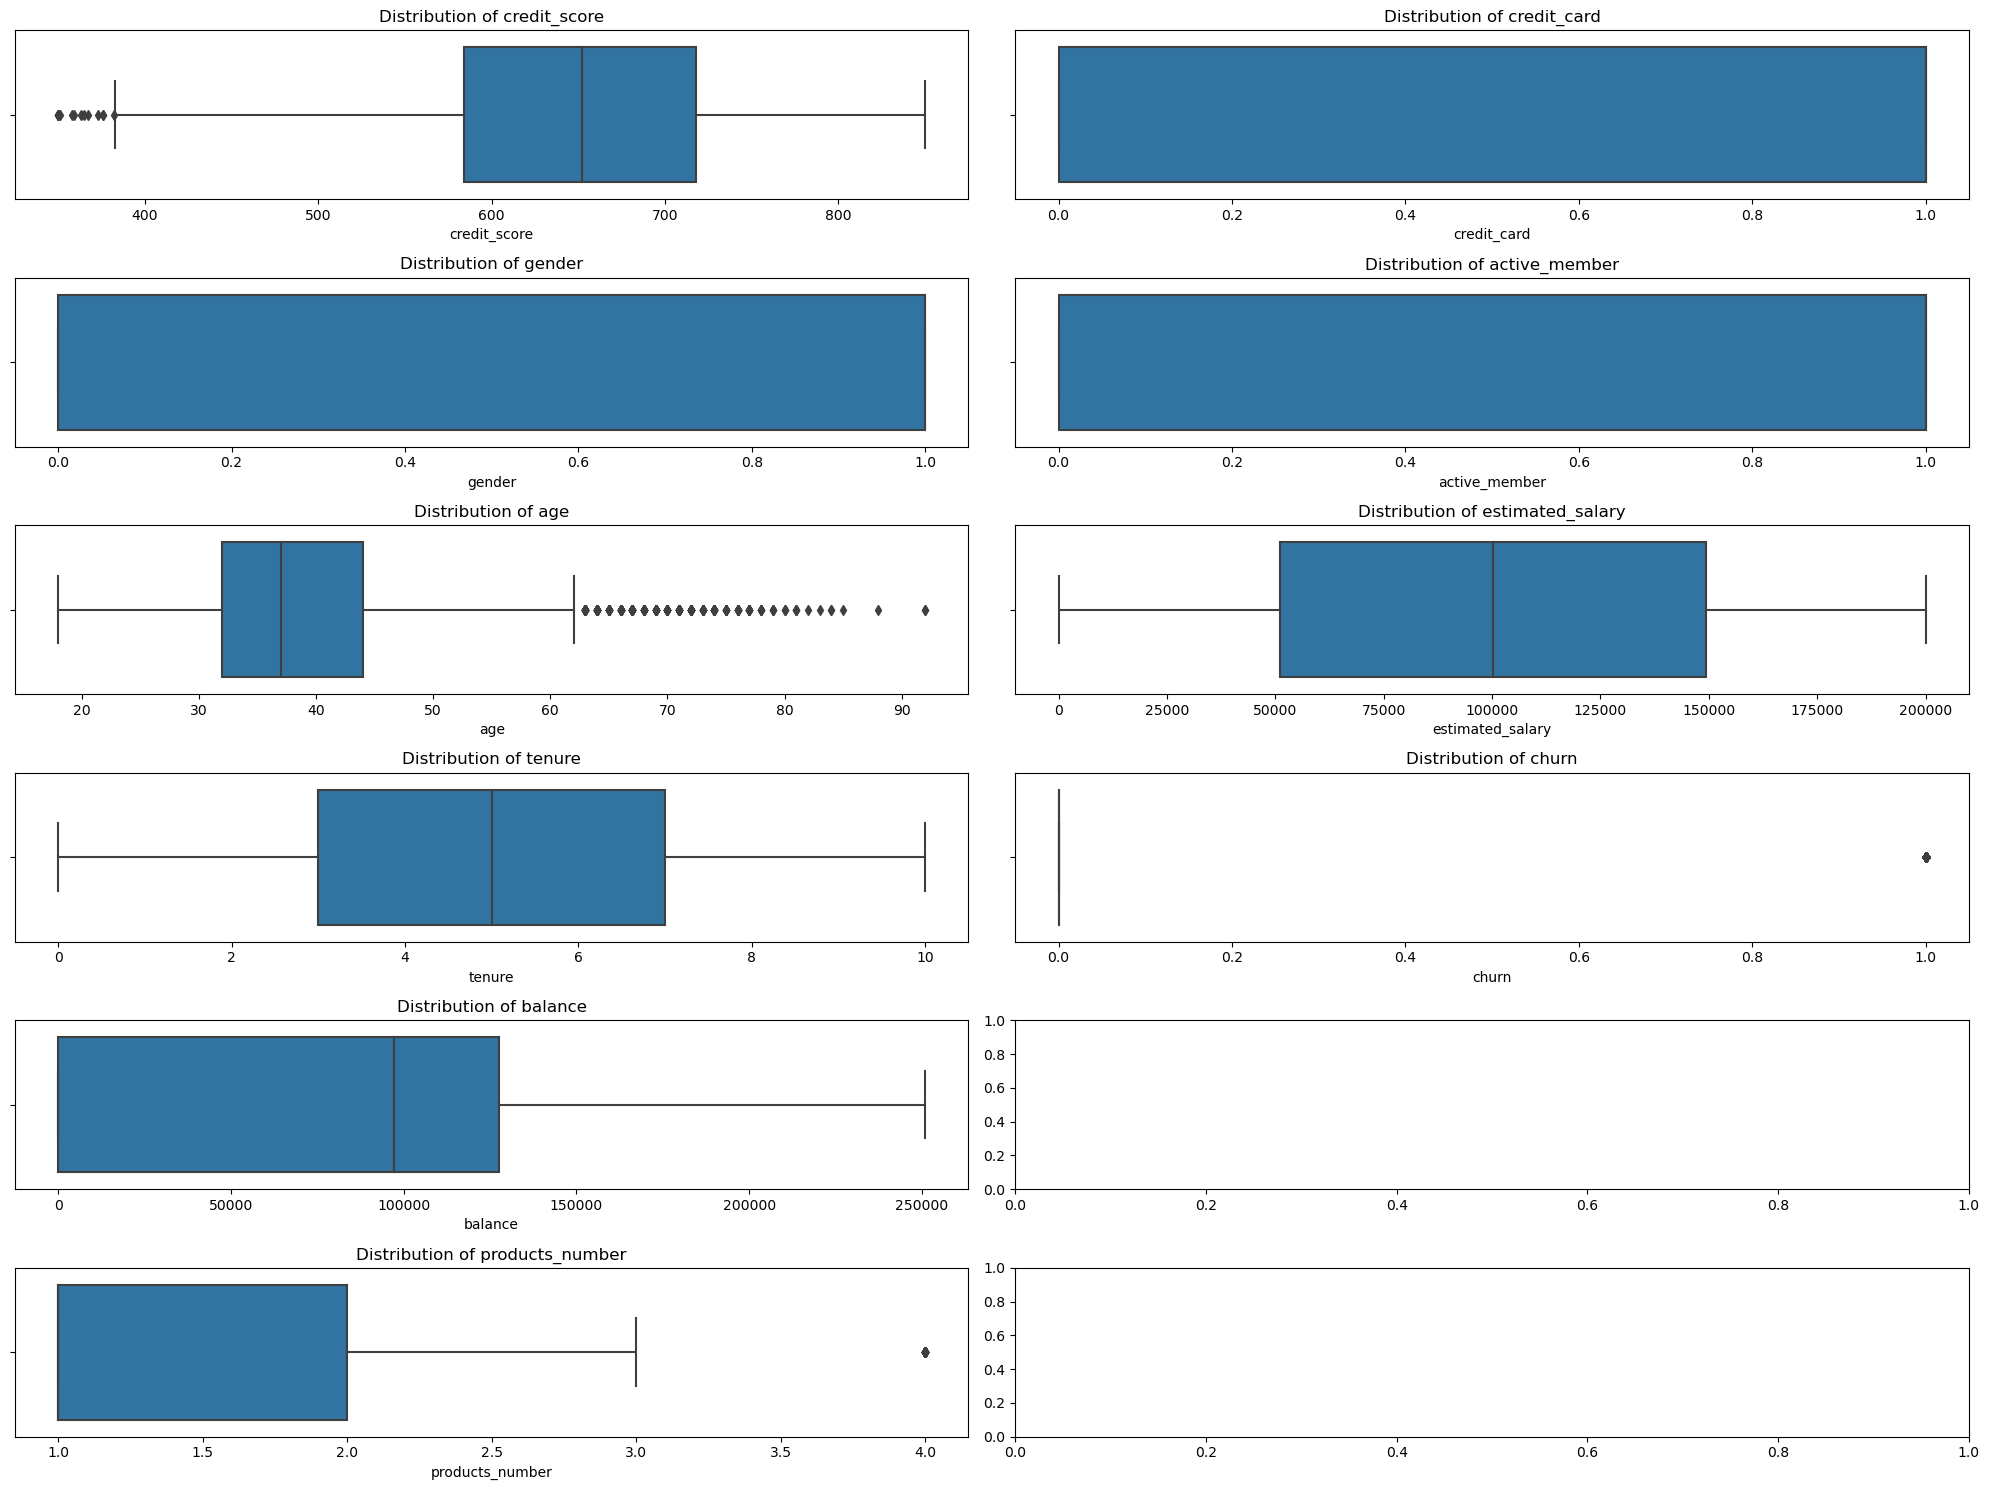

In [8]:
fig, axis = plt.subplots(6,2,figsize = (20,15))
for i, col in enumerate(numerical_vars.columns):
    if i < 6:
        j = 0    
        sns.boxplot(x = df[col], ax = axis[i,j])
        axis[i,j].set_title("Distribution of " + col)
    else:
        i = i - 6
        j = 1
        sns.boxplot(x = df[col], ax = axis[i,j])
        axis[i,j].set_title("Distribution of " + col)
plt.tight_layout()

In [9]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### WHAT'S THE CREDIT SCORE PER GENDER?

/tmp/ipykernel_20/2188421241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_chart = df.groupby('gender').mean()\


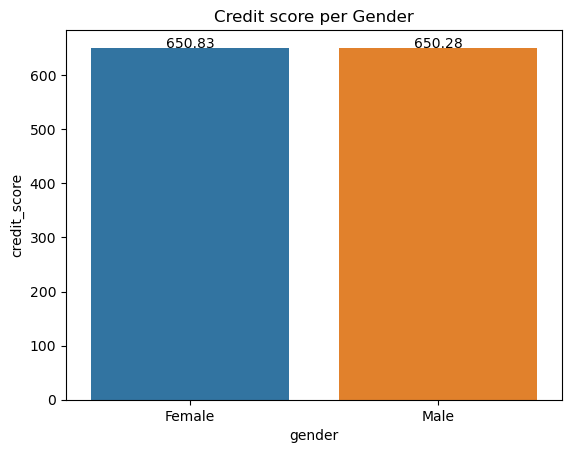

In [10]:
df_chart = df.groupby('gender').mean()\
.reset_index()
sns.barplot(data = df_chart, x = 'gender', y = 'credit_score')
for i in range(len(df_chart.credit_score)):
    plt.text(i, df_chart.credit_score[i], round(df_chart.credit_score[i],2), ha = 'center')
plt.title('Credit score per Gender')
plt.xticks([0,1],['Female','Male'])
plt.show()

### WHAT'S IS THE AVERAGE OF SALARY PER GENDER?

/tmp/ipykernel_20/4053728182.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_chart = df.groupby('gender').mean()\


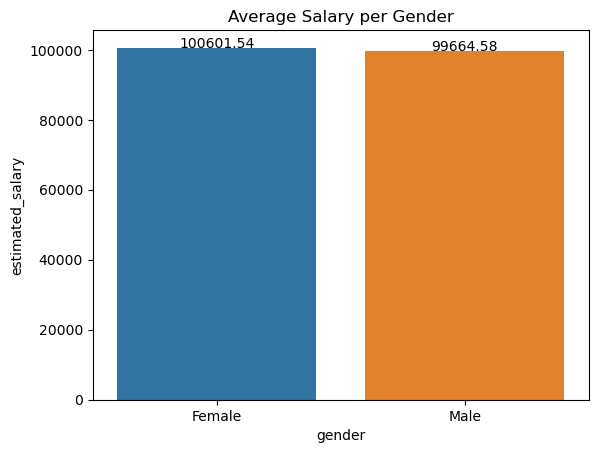

In [11]:
df_chart = df.groupby('gender').mean()\
.reset_index()
sns.barplot(data = df_chart, x = 'gender', y = 'estimated_salary',)
for i in range(len(df_chart.estimated_salary)):
    plt.text(i, df_chart.estimated_salary[i], round(df_chart.estimated_salary[i],2), ha = 'center')
plt.title('Average Salary per Gender')
plt.xticks([0,1],['Female','Male'])
plt.show()

### WHAT'S THE AVERAGE OF AGE PER GENDER?

/tmp/ipykernel_20/341848805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_chart = df.groupby('gender').mean()\


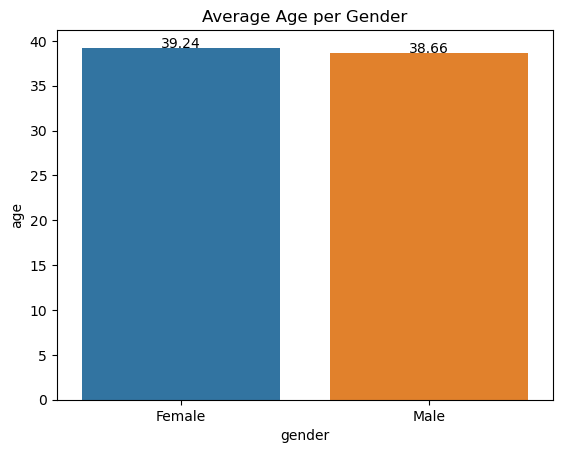

In [12]:
df_chart = df.groupby('gender').mean()\
.reset_index()
sns.barplot(data = df_chart, x = 'gender', y = 'age',)
for i in range(len(df_chart.age)):
    plt.text(i, df_chart.age[i], round(df_chart.age[i],2), ha = 'center')
plt.title('Average Age per Gender')
plt.xticks([0,1],['Female','Male'])
plt.show()

### WHAT'S THE PERCENTAGE OF ACTIVE MEMBERS PER GENDER?

/tmp/ipykernel_20/3100276291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_chart = df.groupby('gender').mean()\


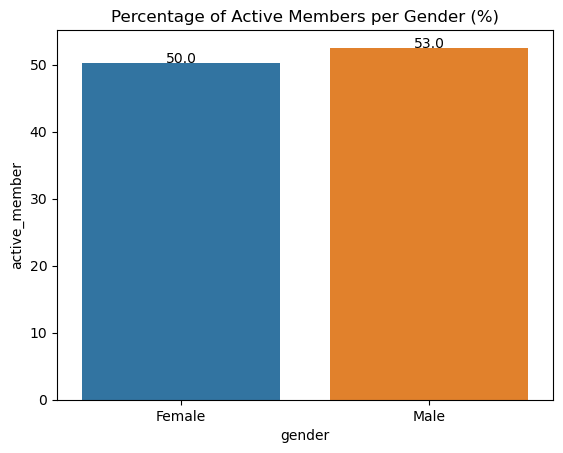

In [13]:
df_chart = df.groupby('gender').mean()\
.reset_index()
sns.barplot(data = df_chart, x = 'gender', y = df_chart.active_member * 100)
plt.title('Percentage of Active Members per Gender (%)')
plt.xticks([0,1],['Female','Male'])
plt.yticks(range(0,60,10))
for i in range(len(df_chart.active_member)):
    plt.text(i, df_chart.active_member[i]*100, round(df_chart.active_member[i],2)*100, ha = 'center')
plt.show()

### WHAT'S THE CHURN PERCENTAGE PER GENDER?

/tmp/ipykernel_20/803618443.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_chart = df.groupby('gender').mean()\


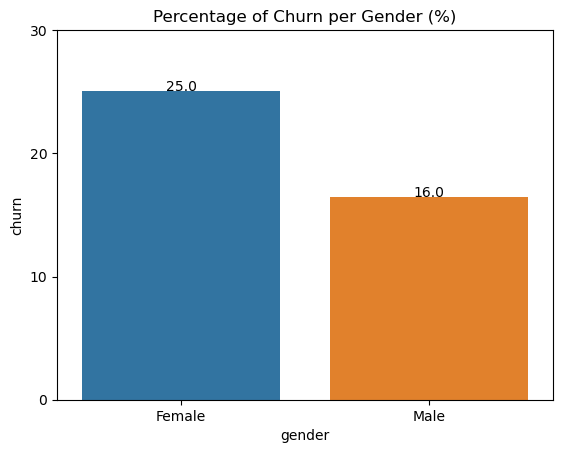

In [14]:
df_chart = df.groupby('gender').mean()\
.reset_index()
sns.barplot(data = df_chart, x = 'gender', y = df_chart.churn * 100)
plt.title('Percentage of Churn per Gender (%)')
plt.xticks([0,1],['Female','Male'])
plt.yticks([0,10,20,30])
for i in range(len(df_chart.churn)):
    plt.text(i, df_chart.churn[i]*100, round(df_chart.churn[i],2)*100, ha = 'center')
plt.show()

### WHAT'S THE CHURN PERCENTAGE PER COUNTRY?

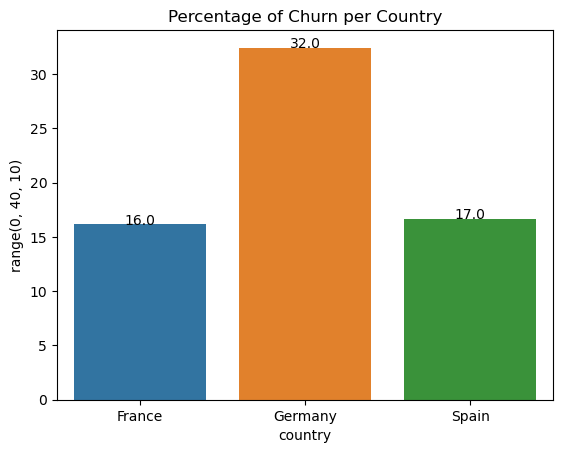

In [15]:
df_chart = df.groupby('country').mean()\
.reset_index()
sns.barplot(data = df_chart, x = 'country', y = df_chart.churn * 100)
plt.title('Percentage of Churn per Country')
plt.ylabel(range(0,40,10))
for i in range(len(df_chart.churn)):
    plt.text(i, df_chart.churn[i]*100, round(df_chart.churn[i],2)*100, ha = 'center')
plt.show()

## FEATURE ENGINEERING

In [16]:
categorical_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [17]:
oh = OneHotEncoder(sparse=False)
cat_vars_encod = oh.fit_transform(categorical_vars)
names_cat_vars_encod = oh.get_feature_names_out()


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
cat_vars_encod = pd.DataFrame(cat_vars_encod,columns = names_cat_vars_encod)
cat_vars_encod

,country_France,country_Germany,country_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [19]:
numerical_vars = numerical_vars.drop('churn', axis = 1)
df_ml = numerical_vars.merge(cat_vars_encod, right_index = True, left_index = True)
df_ml

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [20]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df_ml)
names_df_scaled = sc.get_feature_names_out()

In [21]:
df_scaled = pd.DataFrame(df_scaled, columns = names_df_scaled)
df_scaled

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.997204,-0.578736,-0.573809
9996,-1.391939,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.997204,-0.578736,-0.573809
9997,0.604988,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,0.997204,-0.578736,-0.573809
9998,1.256835,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,-1.002804,1.727904,-0.573809


In [22]:
x = df_scaled
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

### TRAINING VARIOUS MODELS (WITHOUT TUNNING)

In [23]:
svm_model = LinearSVC(random_state = 123)
svm_model.fit(X_train, y_train)

LinearSVC(random_state=123)

In [24]:
svm_model.score(X_test, y_test)

0.8084

In [25]:
rf_model = RandomForestClassifier(random_state = 123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [26]:
rf_model.score(X_test, y_test)

0.862

In [27]:
gb_model = GradientBoostingClassifier(random_state = 123)
gb_model.fit(X_train, y_train)
gb_model.score(X_test, y_test)

0.868

In [28]:
ab_model = AdaBoostClassifier(random_state = 123)
ab_model.fit(X_train, y_train)
ab_model.score(X_test, y_test)

0.8612